In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import json
import os

#import api key
from api_keys import g_key

/Users/my3/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


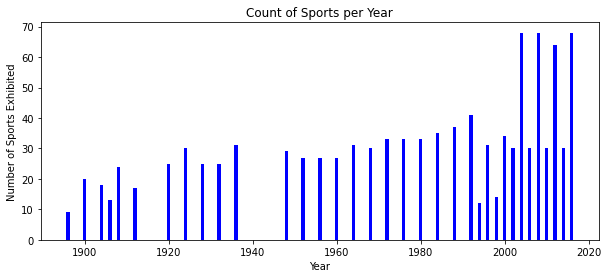

In [2]:
# open dataframe
headers = ["ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"]
df = pd.read_csv('~/Desktop/Project-1/Resources/athlete_events.csv', names=headers)

# get counts
sports_count = list(df.groupby(["Year"],sort=True)["Sport"].nunique()[:-1])
# get years ignoring header
year_list = list(df.Year.unique())[1:] 
# convert str years into ints
year_list = [int(year) for year in year_list] 
# str years repeat at 1956 -- want to mark that index
index = year_list.index(1956)
# remove duplicates in a shortcut way by forming hash dict
year_list = list(dict.fromkeys(year_list)) 
year_list.sort()

# adds all the duplicated years counts to the proper years
for i in range(index, len(sports_count)):
	sports_count[i] += sports_count[i]
#removes the duplicated years
sports_count = sports_count[:len(sports_count) // 2] 

plt.figure(figsize=(10,4))
plt.bar(year_list, sports_count,color='b',alpha=1.0,align="center")
plt.title('Count of Sports per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sports Exhibited')
plt.savefig("SportCountperYear.png")
plt.show()

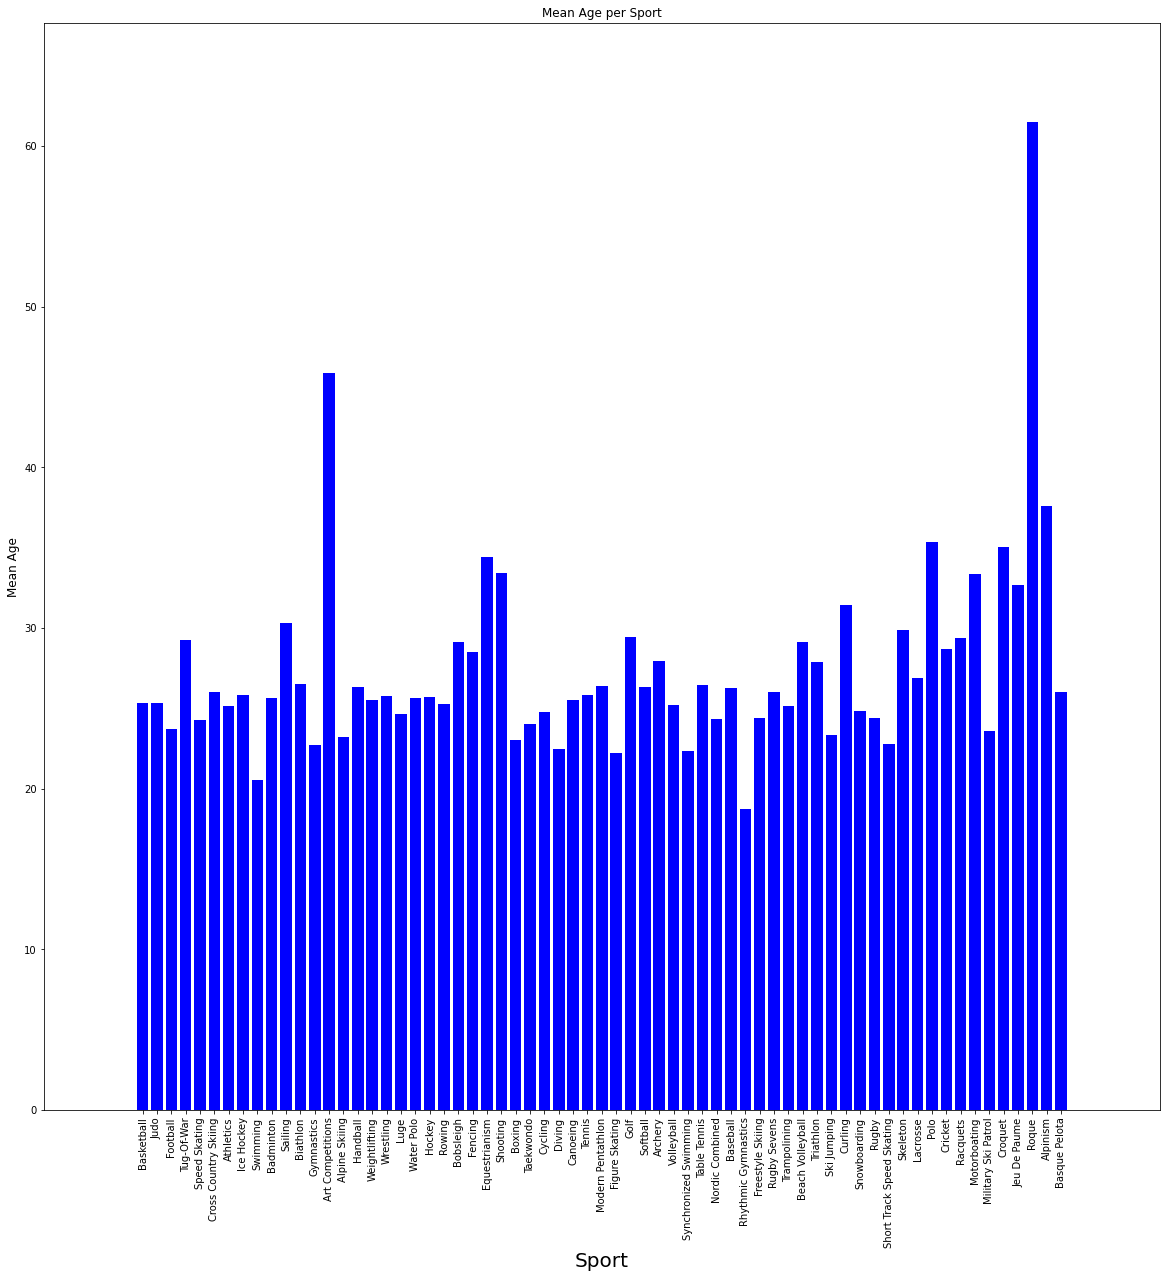

In [3]:
sports_list = list(df["Sport"].unique())
dict_ages = dict()
for sport in sports_list:

    age_list = list(df[df["Sport"] == sport]["Age"])[1:]
    age_list = [float(age) for age in age_list]
    if len(age_list) != 0:
        dict_ages[sport] = np.nanmean(age_list)
import matplotlib.pyplot as plt
#labels = ['Sport', 'Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating', 'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics', 'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting', 'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby', 'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo', 'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol', 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics']
plt.rcParams["figure.figsize"] = (20,20)
plt.bar(dict_ages.keys(), dict_ages.values(),color='b',alpha=1.0, align="center")
plt.title('Mean Age per Sport')
plt.xlabel('Sport', fontsize=20)
plt.ylabel('Mean Age', fontsize=12)
plt.margins(0.1)
plt.xticks(rotation=90)
plt.savefig("MeanAgeperSport.png")
plt.show()

In [4]:
print(sports_list)

['Sport', 'Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating', 'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics', 'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting', 'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing', 'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby', 'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo', 'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol', 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics']
